# FCR-D Analysis of Price and volumes

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import requests
import os


In [2]:
desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop') 
This_file_path = os.getcwd()
total_string_len = len(This_file_path)
string_len_to_remove = len("Data Examination")
path = This_file_path[0:(total_string_len-string_len_to_remove)]
path_processed_data = path + "Processed_data\\"

## Load CSV file
If API has already been runned, load the csv instead. 1 second versus 2 minutes ;-) 

In [4]:
df_raw = pd.read_csv(path_processed_data + 'real.csv') # Change path
print(df_raw.head())

   Hour       Spot  FD1_down  FD2_down   FD1_up    FD2_up  FD1_up_percentage   
0     0  46.599998  42.42105  33.89313  1.95478  49.18715           0.034299  \
1     1  41.330002  42.42105  33.89313  1.95492  49.33709           0.012891   
2     2  42.180000  43.36842  33.89313  1.96262  49.71026           0.013107   
3     3  44.369999  42.42105  33.89313  1.96222  49.45940           0.013804   
4     4  37.669998  41.78947  33.89313  1.95644  49.52272           0.009886   

   FD2_up_percentage  FD1_down_percentage  FD2_down_percentage  FD_act_up   
0           0.965701             0.126667             0.873333        0.0  \
1           0.987109             0.126667             0.873333        0.0   
2           0.986893             0.126667             0.873333        0.0   
3           0.986196             0.126667             0.873333        0.0   
4           0.990114             0.126667             0.873333        0.0   

   FD_act_down  
0     0.000000  
1     0.000282  
2    

In [5]:
Latest_time = '2022-01-01T00:00:00'
Earliest_time = '2023-03-31T23:00:00'

# Create a DatetimeIndex with hourly frequency
date_range = pd.date_range(start=Latest_time, end=Earliest_time, freq='H')

# Create an empty DataFrame with the desired index
df_HourDK_series = pd.DataFrame(index=date_range)

# Optionally, you can reset the index if you want a separate column for the timestamps
df_HourDK_series.reset_index(inplace=True)

df_spot = df_raw["Spot"]
print(df_spot.size,df_HourDK_series.size)

# Assuming you have another DataFrame called df_spot
# Concatenate df_HourDK_series and df_spot
concatenated_df = pd.concat([df_HourDK_series, df_spot], axis=1)
df = concatenated_df.rename(columns={"index": "HourDK"})
print(df)

10920 10920
                   HourDK       Spot
0     2022-01-01 00:00:00  46.599998
1     2022-01-01 01:00:00  41.330002
2     2022-01-01 02:00:00  42.180000
3     2022-01-01 03:00:00  44.369999
4     2022-01-01 04:00:00  37.669998
...                   ...        ...
10915 2023-03-31 19:00:00  92.500000
10916 2023-03-31 20:00:00  48.080002
10917 2023-03-31 21:00:00  40.930000
10918 2023-03-31 22:00:00  35.849998
10919 2023-03-31 23:00:00  30.040001

[10920 rows x 2 columns]


# DA price Analysis

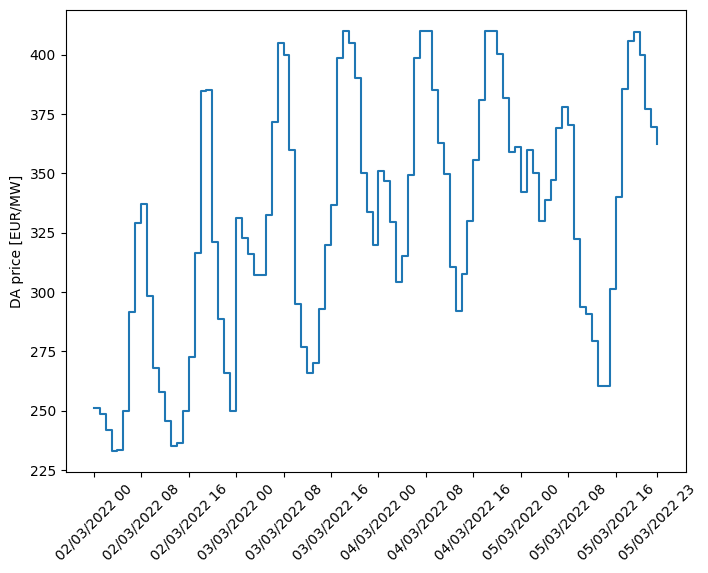

In [6]:
Latest_time = '2022-03-02T00:00:00'
Earliest_time = '2022-03-05T23:00:00'

fig, axs = plt.subplots(figsize=(8, 6), dpi=100)

mask = (df["HourDK"] >= Latest_time) & (df["HourDK"] <= Earliest_time)
price = df["Spot"].loc[mask].reset_index(drop=True)
plt.plot(price, drawstyle='steps-post')

xaxis = df["HourDK"].loc[mask].reset_index(drop=True)
xaxis = pd.to_datetime(xaxis)# Convert xaxis to datetime

# Set the x-axis ticks to be monthly
num_ticks = len(xaxis)
tick_step = max(1, int(np.ceil(num_ticks / 12))) # Show at least one tick per month
month_ticks = xaxis.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
plt.xticks(xaxis.index[month_ticks], xaxis[month_ticks].dt.strftime("%d/%m/%Y %H"), rotation=45)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel("DA price [EUR/MW]")
plt.show()


In [7]:
import pandas as pd

# Plot settings:
# Specify the time axis
Latest_time = '2022-01-01T00:00:00'
Earliest_time = '2023-03-31T23:00:00'

mask = (df["HourDK"] >= Latest_time) & (df["HourDK"] <= Earliest_time)
price = df["Spot"].loc[mask].reset_index(drop=True)

xaxis = df["HourDK"].loc[mask].reset_index(drop=True)
xaxis = pd.to_datetime(xaxis)

tick_step = pd.to_datetime(["2022-01-01 00:00:00", "2022-02-01 00:00:00","2022-03-01 00:00:00","2022-04-01 00:00:00","2022-05-01 00:00:00",
             "2022-06-01 00:00:00", "2022-07-01 00:00:00","2022-08-01 00:00:00","2022-09-01 00:00:00","2022-10-01 00:00:00",
             "2022-11-01 00:00:00", "2022-12-01 00:00:00","2023-01-01 00:00:00","2023-02-01 00:00:00","2023-03-01 00:00:00"])
ticks = xaxis.isin(tick_step)
indexes = np.where(ticks)[0]


# small plot 1
Latest_time_zoom = '2022-03-02T00:00:00'
Earliest_time_zoom = '2022-03-05T23:00:00'

mask_zoom = (df["HourDK"] >= Latest_time_zoom) & (df["HourDK"] <= Earliest_time_zoom)
price_zoom1 = df["Spot"].loc[mask_zoom]
xaxis_zoom1 = df["HourDK"].loc[mask_zoom]
xaxis_zoom1 = pd.to_datetime(xaxis_zoom1)

tick_step1 = pd.to_datetime(["2023-01-03 00:00:00","2023-01-04 00:00:00","2023-01-05 00:00:00"])
ticks1 = xaxis_zoom1.isin(tick_step1)


# small plot 2
Latest_time_zoom = '2022-03-02T00:00:00'
Earliest_time_zoom = '2022-03-05T23:00:00'

mask_zoom = (df["HourDK"] >= Latest_time_zoom) & (df["HourDK"] <= Earliest_time_zoom)
price_zoom2 = df["Spot"].loc[mask_zoom]
xaxis_zoom2 = df["HourDK"].loc[mask_zoom]
xaxis_zoom2 = pd.to_datetime(xaxis_zoom2)

tick_step2 = pd.to_datetime(["2022-03-03 00:00:00","2022-03-04 00:00:00","2022-03-05 00:00:00"])
ticks2 = xaxis_zoom2.isin(tick_step2)


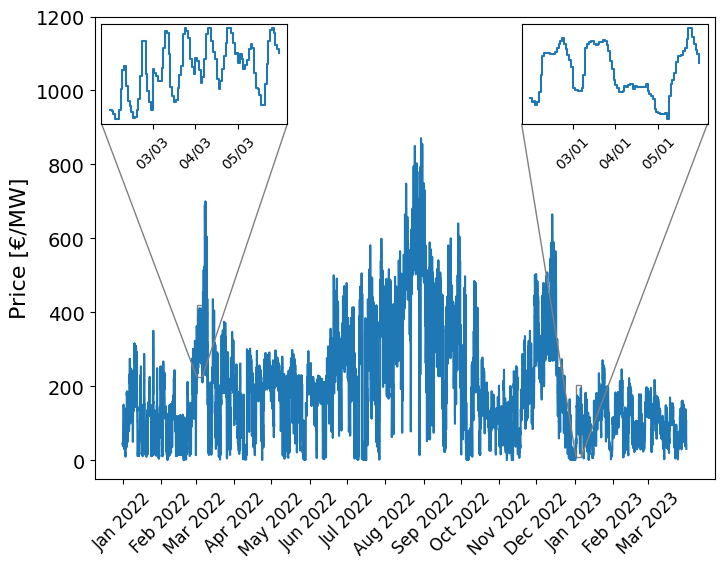

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset,inset_axes
import pandas as pd



#############################################
#############  Plot settings:  ##############
#############################################

# Specify the time axis
Latest_time = '2022-01-01T00:00:00'
Earliest_time = '2023-03-31T23:00:00'

mask = (df["HourDK"] >= Latest_time) & (df["HourDK"] <= Earliest_time)
price = df["Spot"].loc[mask].reset_index(drop=True)

xaxis = df["HourDK"].loc[mask].reset_index(drop=True)
xaxis = pd.to_datetime(xaxis)

tick_step = pd.to_datetime(["2022-01-01 00:00:00", "2022-02-01 00:00:00","2022-03-01 00:00:00","2022-04-01 00:00:00","2022-05-01 00:00:00",
             "2022-06-01 00:00:00", "2022-07-01 00:00:00","2022-08-01 00:00:00","2022-09-01 00:00:00","2022-10-01 00:00:00",
             "2022-11-01 00:00:00", "2022-12-01 00:00:00","2023-01-01 00:00:00","2023-02-01 00:00:00","2023-03-01 00:00:00"])
ticks = xaxis.isin(tick_step)
indexes = np.where(ticks)[0]


# small plot 1
Latest_time_zoom = '2023-01-02T00:00:00'
Earliest_time_zoom = '2023-01-05T23:00:00'

mask_zoom = (df["HourDK"] >= Latest_time_zoom) & (df["HourDK"] <= Earliest_time_zoom)
price_zoom1 = df["Spot"].loc[mask_zoom]
xaxis_zoom1 = df["HourDK"].loc[mask_zoom]
xaxis_zoom1 = pd.to_datetime(xaxis_zoom1)

tick_step1 = pd.to_datetime(["2023-01-03 00:00:00","2023-01-04 00:00:00","2023-01-05 00:00:00"])
ticks1 = xaxis_zoom1.isin(tick_step1)


# small plot 2
Latest_time_zoom = '2022-03-02T00:00:00'
Earliest_time_zoom = '2022-03-05T23:00:00'

mask_zoom = (df["HourDK"] >= Latest_time_zoom) & (df["HourDK"] <= Earliest_time_zoom)
price_zoom2 = df["Spot"].loc[mask_zoom]
xaxis_zoom2 = df["HourDK"].loc[mask_zoom]
xaxis_zoom2 = pd.to_datetime(xaxis_zoom2)

tick_step2 = pd.to_datetime(["2022-03-03 00:00:00","2022-03-04 00:00:00","2022-03-05 00:00:00"])
ticks2 = xaxis_zoom2.isin(tick_step2)





######################################
########        PLOT IT      #########
######################################
fig, axs = plt.subplots(figsize=(8, 6), dpi=100)
# Main plot
plt.plot(price, drawstyle='steps-post')
plt.xticks(xaxis.index[ticks], xaxis[ticks].dt.strftime("%b %Y"), rotation=45, fontsize=12)
#axs.set_xticklabels(xaxis[month_ticks].dt.strftime("%b %Y"), rotation=45, fontsize=10)
axs.set_ylim(-50, 1200)
plt.ylabel("Price [\u20AC/MW]",fontsize=16)

# First small plot
ax_zoom1 = inset_axes(axs, width="30%", height=1, loc=1)
ax_zoom1.plot(price_zoom1, drawstyle='steps-post')
plt.xticks(xaxis_zoom1.index[ticks1], xaxis_zoom1[ticks1].dt.strftime("%d/%m"), rotation=45)
mark_inset(axs, ax_zoom1, loc1=4, loc2=3, fc="none", ec="0.5")
ax_zoom1.set_yticks([])

# Second small plot (zoomed-in)
ax_zoom2 = inset_axes(axs, width="30%", height=1, loc=2)
ax_zoom2.plot(price_zoom2, drawstyle='steps-post')
plt.xticks(xaxis_zoom2.index[ticks2], xaxis_zoom2[ticks2].dt.strftime("%d/%m"), rotation=45)
mark_inset(axs, ax_zoom2, loc1=4, loc2=3, fc="none", ec="0.5")
ax_zoom2.set_yticks([])


axs.tick_params(axis='y', which='major', labelsize=14)

plt.savefig('DA_prices.pdf', format="pdf", bbox_inches="tight")
plt.show()
